In [1]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model

In [2]:
import numpy as np
import pandas as pd
train = pd.read_csv('NSL_KDD_bayesian_enc_training_set.csv')
test = pd.read_csv('NSL_KDD_bayesian_enc_testing_set.csv')

In [3]:
train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,label
0,0,491,0,0,0,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,0.494592,0.312151,0.187263,0
1,0,146,0,0,0,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,0.193255,0.486434,0.187263,0
2,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,0.494592,0.931123,0.990397,1
3,0,232,8153,0,0,0,0,0,1,0,...,0.03,0.04,0.03,0.01,0.00,0.01,0.494592,0.071984,0.187263,0
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.494592,0.071984,0.187263,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,0.494592,0.931123,0.990397,1
125969,8,105,145,0,0,0,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,0.193255,0.931123,0.187263,0
125970,0,2231,384,0,0,0,0,0,1,0,...,0.00,0.00,0.72,0.00,0.01,0.00,0.494592,0.072754,0.187263,0
125971,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,0.494592,1.000000,0.990397,1


In [4]:
x1 = train.iloc[:,1:41]
y1 = train['label']
print(x1)
print(y1)

        src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0             491          0     0               0       0    0   
1             146          0     0               0       0    0   
2               0          0     0               0       0    0   
3             232       8153     0               0       0    0   
4             199        420     0               0       0    0   
...           ...        ...   ...             ...     ...  ...   
125968          0          0     0               0       0    0   
125969        105        145     0               0       0    0   
125970       2231        384     0               0       0    0   
125971          0          0     0               0       0    0   
125972        151          0     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  root_shell  ...  \
0                       0          0                0           0  ...   
1                       0          0           

In [5]:
x2 = test.iloc[:,1:41]
y2 = test['label']
print(x2)
print(y2)

       src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0          0     0               0       0    0   
1              0          0     0               0       0    0   
2          12983          0     0               0       0    0   
3             20          0     0               0       0    0   
4              0         15     0               0       0    0   
...          ...        ...   ...             ...     ...  ...   
22539        794        333     0               0       0    0   
22540        317        938     0               0       0    0   
22541      54540       8314     0               0       0    2   
22542         42         42     0               0       0    0   
22543          0          0     0               0       0    0   

       num_failed_logins  logged_in  num_compromised  root_shell  ...  \
0                      0          0                0           0  ...   
1                      0          0                0         

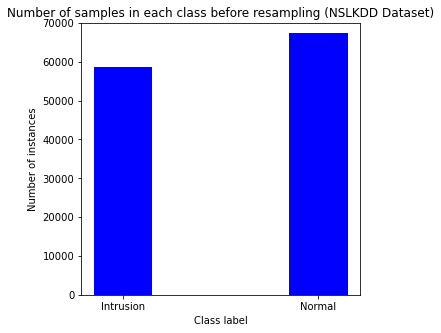

In [6]:
from matplotlib import pyplot as plt
data1 = {'Intrusion':58630, 'Normal':67343}
Class_label = list(data1.keys())
Number_of_instances = list(data1.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Class_label, Number_of_instances, color ='blue',
        width = 0.3)
plt.ylim(0, 70000)
plt.xlabel("Class label")
plt.ylabel("Number of instances")
plt.title("Number of samples in each class before resampling (NSLKDD Dataset)")
plt.show()

In [7]:
# RESAMPLING

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1, y1 = sm.fit_sample(x1, y1) 

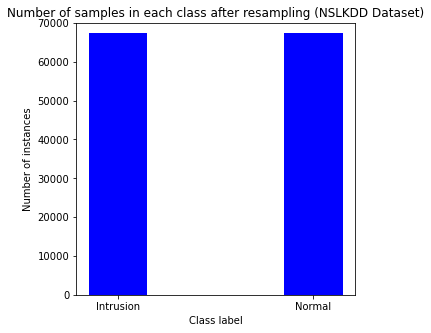

In [8]:
data2 = {'Intrusion':67343, 'Normal':67343}
Class_label = list(data2.keys())
Number_of_instances = list(data2.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Class_label, Number_of_instances, color ='blue',
        width = 0.3)
plt.ylim(0, 70000)
plt.xlabel("Class label")
plt.ylabel("Number of instances")
plt.title("Number of samples in each class after resampling (NSLKDD Dataset)")
plt.show()

In [9]:
# NORMALIZATION

from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler()
model.fit(x1)
x1 = model.transform(x1)
x2 = model.transform(x2)

In [10]:
# 1. AUTOENCODER BASED FEATURE EXTRACTION

n_inputs = x1.shape[1]
n_inputs = x2.shape[1]

In [11]:
input_data_shape = Input(shape=(n_inputs,))
encoder = Dense(n_inputs*3)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder = LeakyReLU()(encoder)
encoder = Dense(n_inputs)(encoder)
encoder = BatchNormalization()(encoder)
encoder = LeakyReLU()(encoder)
n_bottleneck = round(float(n_inputs)/3.0)
bottleneck = Dense(n_bottleneck)(encoder)
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
decoder = Dense(n_inputs*3)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [12]:
output = Dense(n_inputs,activation = 'relu')(decoder)
model_AE = Model(inputs = input_data_shape,outputs = output)
model_AE.compile(optimizer = 'adam',loss='mse')
model_AE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 dense (Dense)               (None, 120)               4920      
                                                                 
 batch_normalization (BatchN  (None, 120)              480       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 120)               0         
                                                                 
 dense_1 (Dense)             (None, 40)                4840      
                                                                 
 batch_normalization_1 (Batc  (None, 40)               160       
 hNormalization)                                             

In [13]:
history = model_AE.fit(x1,x1,epochs = 20,batch_size = 256,shuffle=True,verbose = 2,validation_data = (x2,x2))

Epoch 1/20
527/527 - 15s - loss: 0.0215 - val_loss: 0.0105 - 15s/epoch - 29ms/step
Epoch 2/20
527/527 - 3s - loss: 0.0106 - val_loss: 0.0083 - 3s/epoch - 6ms/step
Epoch 3/20
527/527 - 3s - loss: 0.0099 - val_loss: 0.0069 - 3s/epoch - 6ms/step
Epoch 4/20
527/527 - 3s - loss: 0.0089 - val_loss: 0.0050 - 3s/epoch - 6ms/step
Epoch 5/20
527/527 - 3s - loss: 0.0086 - val_loss: 0.0048 - 3s/epoch - 6ms/step
Epoch 6/20
527/527 - 3s - loss: 0.0050 - val_loss: 0.0026 - 3s/epoch - 6ms/step
Epoch 7/20
527/527 - 3s - loss: 0.0011 - val_loss: 0.0025 - 3s/epoch - 6ms/step
Epoch 8/20
527/527 - 3s - loss: 0.0010 - val_loss: 0.0025 - 3s/epoch - 6ms/step
Epoch 9/20
527/527 - 3s - loss: 9.8612e-04 - val_loss: 0.0023 - 3s/epoch - 6ms/step
Epoch 10/20
527/527 - 3s - loss: 9.5197e-04 - val_loss: 0.0023 - 3s/epoch - 6ms/step
Epoch 11/20
527/527 - 3s - loss: 9.0473e-04 - val_loss: 0.0026 - 3s/epoch - 6ms/step
Epoch 12/20
527/527 - 3s - loss: 8.9451e-04 - val_loss: 0.0025 - 3s/epoch - 6ms/step
Epoch 13/20
527/52

In [14]:
encoder = Model(inputs = input_data_shape,outputs = bottleneck)
encoder.save('AE_encoder_NSLKDD.h5')

In [15]:
encoder = load_model('AE_encoder_NSLKDD.h5')
x1_encode = encoder.predict(x1)
x2_encode = encoder.predict(x2)

In [16]:
x1_encode

array([[-1.5548723 ,  1.5362965 , -0.7627607 , ..., -0.5106836 ,
        -0.10679884, -0.9799878 ],
       [-0.80648875,  2.2410462 , -1.2976668 , ...,  0.56567657,
         0.6531742 ,  0.42097822],
       [ 1.6589222 ,  0.97140384, -0.38595054, ...,  0.17130145,
        -0.6077372 ,  1.0049777 ],
       ...,
       [ 1.5589899 ,  1.4730134 , -0.5943333 , ...,  0.2212636 ,
        -0.92220616,  1.1168474 ],
       [-0.58657396,  4.90947   ,  2.6329892 , ...,  1.5101887 ,
        -3.3694575 ,  4.3705683 ],
       [ 1.5418314 ,  1.0181034 , -0.30032307, ...,  0.14645712,
        -0.74999356,  1.0831069 ]], dtype=float32)

In [17]:
x2_encode

array([[-0.71840256,  5.1541433 ,  2.7547393 , ...,  1.4155235 ,
        -3.471224  ,  4.4804416 ],
       [-0.6189715 ,  5.0468116 ,  2.6241183 , ...,  1.5344408 ,
        -3.4920402 ,  4.459587  ],
       [-1.2335113 ,  1.2587199 , -0.72262114, ..., -0.048758  ,
         0.26648554, -0.86943114],
       ...,
       [-0.6393793 ,  0.9361442 , -1.6817654 , ...,  0.31789228,
         1.0604064 , -0.6702227 ],
       [ 0.09264144,  1.7906547 , -1.676525  , ...,  0.26340795,
         1.4130322 , -0.15997863],
       [-1.371     ,  3.3122654 ,  1.2861615 , ...,  0.91148734,
        -0.50297534,  4.1787405 ]], dtype=float32)

In [18]:
x1_encode.shape

(134686, 13)

In [19]:
x2_encode.shape

(22544, 13)

In [20]:
recon_feat_train = pd.DataFrame(x1_encode, columns =['AE_0', 'AE_1','AE_2','AE_3','AE_4','AE_5','AE_6','AE_7','AE_8','AE_9',
                                       'AE_10','AE_11','AE_12'])
recon_feat_train

,AE_0,AE_1,AE_2,AE_3,AE_4,AE_5,AE_6,AE_7,AE_8,AE_9,AE_10,AE_11,AE_12
0,-1.554872,1.536296,-0.762761,-1.110261,-0.202225,-0.058364,0.619533,1.306817,-1.511555,0.377354,-0.510684,-0.106799,-0.979988
1,-0.806489,2.241046,-1.297667,-2.473897,-0.947008,-0.711981,-0.763693,2.787829,-0.453681,-1.265213,0.565677,0.653174,0.420978
2,1.658922,0.971404,-0.385951,-0.323164,-1.519015,0.248093,-4.687656,-0.292421,-0.058314,-1.608291,0.171301,-0.607737,1.004978
3,-0.494285,-0.033656,-1.056131,0.526770,-0.529084,-0.258704,1.000635,-0.255153,0.380750,1.760963,1.262354,0.595796,-1.023822
4,-0.765602,0.774770,-1.598891,0.752531,-0.676651,-1.251208,1.166610,0.318992,0.146592,1.499208,0.183984,0.924630,-0.587340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134681,-0.889857,5.268679,2.268876,0.101190,-4.431375,1.724127,2.293243,0.986607,0.333991,-1.469306,0.789211,-2.631502,4.779145
134682,-0.535681,4.878915,2.687951,-0.316678,-4.439333,2.801513,2.473078,1.098050,1.012745,1.823800,1.515573,-3.458547,4.450511
134683,1.558990,1.473013,-0.594333,-0.223422,-1.772642,-0.222255,-4.770901,-0.774039,-0.214186,-1.963127,0.221264,-0.922206,1.116847
134684,-0.586574,4.909470,2.632989,-0.359542,-4.415063,2.809284,2.497044,1.124880,1.012143,1.881009,1.510189,-3.369457,4.370568


In [21]:
recon_feat_test = pd.DataFrame(x2_encode, columns =['AE_0', 'AE_1','AE_2','AE_3','AE_4','AE_5','AE_6','AE_7','AE_8','AE_9',
                                       'AE_10','AE_11','AE_12'])
recon_feat_test

,AE_0,AE_1,AE_2,AE_3,AE_4,AE_5,AE_6,AE_7,AE_8,AE_9,AE_10,AE_11,AE_12
0,-0.718403,5.154143,2.754739,-0.184856,-4.202846,2.883865,2.103139,1.070096,0.707712,1.582345,1.415524,-3.471224,4.480442
1,-0.618972,5.046812,2.624118,-0.358072,-4.480897,2.810802,2.378828,1.118542,0.943333,1.717173,1.534441,-3.492040,4.459587
2,-1.233511,1.258720,-0.722621,-0.749187,0.276110,-0.149647,0.211717,1.506193,-1.755917,0.296378,-0.048758,0.266486,-0.869431
3,-2.513957,0.699530,0.036805,-0.264590,0.753720,-0.241110,0.096025,1.989973,-1.565037,-0.663958,0.527925,1.053021,-2.636520
4,-0.843639,2.704245,1.382450,0.049197,-0.395254,1.025230,1.957782,-1.305655,0.761562,1.325055,1.800350,-1.069800,1.537035
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-1.107598,0.444459,-1.013846,0.056863,-0.935853,-0.770587,1.864091,0.365988,-0.232720,1.420960,0.486134,0.290721,-1.137936
22540,-0.785348,0.654932,-1.491843,0.607295,-0.691836,-0.994327,1.203778,0.175806,0.138470,1.490486,0.467490,1.015944,-0.773792
22541,-0.639379,0.936144,-1.681765,0.639363,-0.692394,-1.144625,1.277333,0.220232,0.197822,1.547522,0.317892,1.060406,-0.670223
22542,0.092641,1.790655,-1.676525,-0.239714,-0.015518,-0.551438,-0.796520,0.202866,-0.783639,0.884244,0.263408,1.413032,-0.159979


In [22]:
x1_recon = recon_feat_train.iloc[:,:]
print(x1_recon)
x2_recon = recon_feat_test.iloc[:,:]
print(x2_recon)

            AE_0      AE_1      AE_2      AE_3      AE_4      AE_5      AE_6  \
0      -1.554872  1.536296 -0.762761 -1.110261 -0.202225 -0.058364  0.619533   
1      -0.806489  2.241046 -1.297667 -2.473897 -0.947008 -0.711981 -0.763693   
2       1.658922  0.971404 -0.385951 -0.323164 -1.519015  0.248093 -4.687656   
3      -0.494285 -0.033656 -1.056131  0.526770 -0.529084 -0.258704  1.000635   
4      -0.765602  0.774770 -1.598891  0.752531 -0.676651 -1.251208  1.166610   
...          ...       ...       ...       ...       ...       ...       ...   
134681 -0.889857  5.268679  2.268876  0.101190 -4.431375  1.724127  2.293243   
134682 -0.535681  4.878915  2.687951 -0.316678 -4.439333  2.801513  2.473078   
134683  1.558990  1.473013 -0.594333 -0.223422 -1.772642 -0.222255 -4.770901   
134684 -0.586574  4.909470  2.632989 -0.359542 -4.415063  2.809284  2.497044   
134685  1.541831  1.018103 -0.300323 -0.441402 -1.541450  0.236198 -4.548999   

            AE_7      AE_8      AE_9   

In [23]:
# 2. XGBoost CLASSIFIER MODEL

from xgboost import XGBClassifier
import xgboost as xgb
params = {
             'learning_rate': 0.03,
        'n_estimators':381,
        'max_depth':5,
        'min_child_weight':8,
        'gamma':0.0,
        'reg_alpha' : 0.005,
        'subsample':0.9,
        'colsample_bytree':0.6,
        'objective': 'binary:logistic',
        'nthread':4,
        'scale_pos_weight':1,
        'seed':27
         }
model_xgb = XGBClassifier(**params)
model_xgb.fit(x1_recon, y1)

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:36:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=8, missing=nan, monotone_constraints='()',
              n_estimators=381, n_jobs=4, nthread=4, num_parallel_tree=1,
              predictor='auto', random_state=27, reg_alpha=0.005, reg_lambda=1,
              scale_pos_weight=1, seed=27, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [24]:
# ROC AUC

y_pred_new = model_xgb.predict(x2_recon)
print(y_pred_new)
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_new)
print('ROC AUC: %f' % auc)

[1 1 0 ... 0 0 1]
ROC AUC: 0.780277


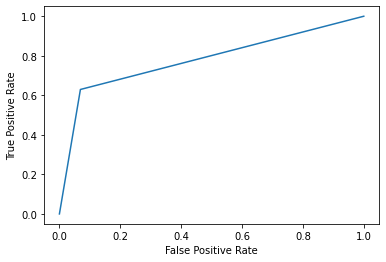

In [25]:
from matplotlib import pyplot as plt
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_new)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
accuracy = accuracy_score(y2, y_pred_new)*100
print("Accuracy in XGBoost classifier model:-", accuracy)
print("Confusion Matrix =", metrics.confusion_matrix(y2, y_pred_new, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y2, y_pred_new, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y2, y_pred_new, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y2, y_pred_new, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

print("F1 Score = ",f1_score(y2, y_pred_new, average='macro'))

Accuracy in XGBoost classifier model:- 75.94038325053229
Confusion Matrix = [[9041  670]
 [4754 8079]]
Recall = 0.759403832505323
Precision = 0.8079606495049791
Classification Report =
               precision    recall  f1-score   support

           0       0.66      0.93      0.77      9711
           1       0.92      0.63      0.75     12833

    accuracy                           0.76     22544
   macro avg       0.79      0.78      0.76     22544
weighted avg       0.81      0.76      0.76     22544

F1 Score =  0.7589649296268024


<AxesSubplot:>

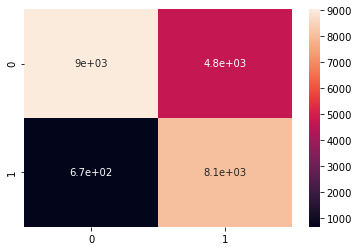

In [27]:
cm_xgb = metrics.confusion_matrix(y_pred_new, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_xgb, annot=True)

<AxesSubplot:>

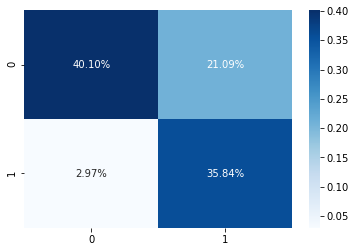

In [28]:
sns.heatmap(cm_xgb/np.sum(cm_xgb), annot=True, 
            fmt='.2%', cmap='Blues')

In [29]:
# 3. DNN CLASSIFIER MODEL

from tensorflow import keras
model_DNN=keras.models.Sequential()
model_DNN.add(keras.layers.Dense(units=13, activation = "relu",input_shape = x1_encode.shape[1:]))
model_DNN.add(keras.layers.Dense(units=26,activation = "relu"))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=52,activation = "relu" ))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=104,activation = "relu" ))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=208,activation = "relu" ))
model_DNN.add(keras.layers.Dense(units=2, activation = "sigmoid"))
model_DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 13)                182       
                                                                 
 dense_7 (Dense)             (None, 26)                364       
                                                                 
 dropout (Dropout)           (None, 26)                0         
                                                                 
 dense_8 (Dense)             (None, 52)                1404      
                                                                 
 dropout_1 (Dropout)         (None, 52)                0         
                                                                 
 dense_9 (Dense)             (None, 104)               5512      
                                                                 
 dropout_2 (Dropout)         (None, 104)               0

In [30]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model_DNN.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics="accuracy")
es=keras.callbacks.EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
cp=keras.callbacks.ModelCheckpoint("SaranyaDNNNetAE_new.h5",monitor='val_loss')
history = model_DNN.fit(x1_encode, y1,epochs=50,batch_size=16,callbacks=[es,cp],validation_data = [x2_encode, y2])
testloss,testaccuracy=model_DNN.evaluate(x2_encode,y2)
print("Test loss = ",testloss)
print("Test accuracy = ",testaccuracy)

Epoch 1/50
8418/8418 [==============================] - 29s 3ms/step - loss: 0.1246 - accuracy: 0.9602 - val_loss: 1.0697 - val_accuracy: 0.7177
Epoch 2/50
8418/8418 [==============================] - 27s 3ms/step - loss: 0.1342 - accuracy: 0.9619 - val_loss: 2.5269 - val_accuracy: 0.7079
Epoch 3/50
8418/8418 [==============================] - 28s 3ms/step - loss: 0.1569 - accuracy: 0.9578 - val_loss: 3.6984 - val_accuracy: 0.7283
Epoch 4/50
8418/8418 [==============================] - 25s 3ms/step - loss: 0.1800 - accuracy: 0.9591 - val_loss: 1.0989 - val_accuracy: 0.7317
Epoch 5/50
8418/8418 [==============================] - 27s 3ms/step - loss: 0.1780 - accuracy: 0.9640 - val_loss: 3.9187 - val_accuracy: 0.7377
Epoch 6/50
8418/8418 [==============================] - 25s 3ms/step - loss: 0.2023 - accuracy: 0.9536 - val_loss: 5.6848 - val_accuracy: 0.7323
Epoch 7/50
8418/8418 [==============================] - 25s 3ms/step - loss: 0.1918 - accuracy: 0.9542 - val_loss: 5.6233 - val_ac

In [31]:
y_pred_DNN = model_DNN.predict(x2_encode)
print(y_pred_DNN)
y_pred_class_DNN=np.argmax(y_pred_DNN,axis=1)
print(y_pred_class_DNN)
print("Test Loss =",testloss)
print("Test Accuracy =",testaccuracy)

[[1.1968955e-08 1.0000000e+00]
 [3.9878831e-08 1.0000000e+00]
 [9.2504394e-01 7.2777808e-02]
 ...
 [9.2618328e-01 7.1268380e-02]
 [9.5928091e-01 3.0822188e-02]
 [2.5004208e-02 9.9890971e-01]]
[1 1 0 ... 0 0 1]
Test Loss = 1.0697178840637207
Test Accuracy = 0.7177075743675232


In [32]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_class_DNN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.744693


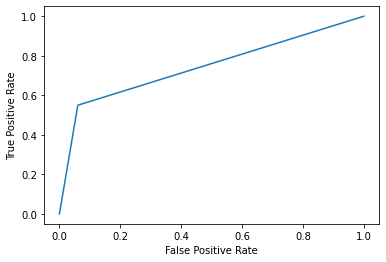

In [33]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_DNN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy in DNN classifier model = ', metrics.accuracy_score(y_pred_class_DNN, y2)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_class_DNN, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_class_DNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_class_DNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_class_DNN, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_class_DNN, y2, average='macro'))

Accuracy in DNN classifier model =  71.7707594038325
Confusion Matrix = [[9124 5777]
 [ 587 7056]]
Recall = 0.7177075940383251
Precision = 0.8074276979565862
Classification Report =
               precision    recall  f1-score   support

           0       0.94      0.61      0.74     14901
           1       0.55      0.92      0.69      7643

    accuracy                           0.72     22544
   macro avg       0.74      0.77      0.72     22544
weighted avg       0.81      0.72      0.72     22544

F1 Score =  0.715312027507709


<AxesSubplot:>

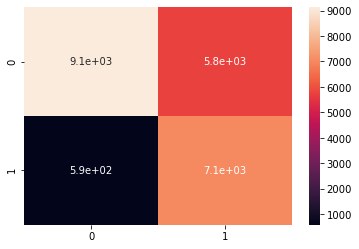

In [35]:
cm_DNN = metrics.confusion_matrix(y_pred_class_DNN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_DNN, annot=True)

<AxesSubplot:>

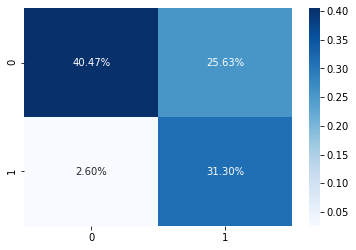

In [36]:
sns.heatmap(cm_DNN/np.sum(cm_DNN), annot=True, 
            fmt='.2%', cmap='Blues')

In [38]:
# 4. CNN CLASSIFIER MODEL

x1_encode_CNN = np.reshape(x1_encode, (x1_encode.shape[0],x1_encode.shape[1],1))
x2_encode_CNN = np.reshape(x2_encode, (x2_encode.shape[0],x2_encode.shape[1],1))

In [39]:
from tensorflow import keras
from tensorflow.keras.layers import Input
from keras.layers import Convolution1D, Dense, Dropout, MaxPooling1D, LSTM
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten
convnet=keras.models.Sequential()
convnet.add(keras.layers.Convolution1D(13,3,activation="relu",input_shape=(13,1)))
convnet.add(keras.layers.BatchNormalization())
convnet.add(keras.layers.MaxPooling1D(2,2))
convnet.add(keras.layers.Dropout(0.25))
convnet.add(keras.layers.Flatten())
convnet.add(keras.layers.Dense(26,activation="relu"))
convnet.add(keras.layers.Dense(2,activation="softmax"))
convnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 13)            52        
                                                                 
 batch_normalization_4 (Batc  (None, 11, 13)           52        
 hNormalization)                                                 
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 13)            0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 5, 13)             0         
                                                                 
 flatten (Flatten)           (None, 65)                0         
                                                                 
 dense_12 (Dense)            (None, 26)               

In [40]:
opt = keras.optimizers.Adam(learning_rate=0.01)
convnet.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics="accuracy")
es=keras.callbacks.EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
cp=keras.callbacks.ModelCheckpoint("SaranyaConvNetAE_new.h5",monitor='val_loss')
history = convnet.fit(x1_encode_CNN,y1,epochs=50,batch_size=16,callbacks=[es,cp],validation_data = [x2_encode_CNN, y2])
testloss,testaccuracy=convnet.evaluate(x2_encode_CNN,y2)
print("Test loss = ",testloss)
print("Test accuracy = ",testaccuracy)

Epoch 1/50
8418/8418 [==============================] - 27s 3ms/step - loss: 0.0839 - accuracy: 0.9694 - val_loss: 0.8764 - val_accuracy: 0.7601
Epoch 2/50
8418/8418 [==============================] - 25s 3ms/step - loss: 0.0719 - accuracy: 0.9731 - val_loss: 1.0882 - val_accuracy: 0.7657
Epoch 3/50
8418/8418 [==============================] - 24s 3ms/step - loss: 0.0705 - accuracy: 0.9733 - val_loss: 0.8798 - val_accuracy: 0.7749
Epoch 4/50
8418/8418 [==============================] - 23s 3ms/step - loss: 0.0681 - accuracy: 0.9736 - val_loss: 1.2527 - val_accuracy: 0.7639
Epoch 5/50
8418/8418 [==============================] - 23s 3ms/step - loss: 0.0671 - accuracy: 0.9743 - val_loss: 0.9159 - val_accuracy: 0.7701
Epoch 6/50
8418/8418 [==============================] - 24s 3ms/step - loss: 0.0666 - accuracy: 0.9749 - val_loss: 1.0946 - val_accuracy: 0.7533
Epoch 7/50
8418/8418 [==============================] - 25s 3ms/step - loss: 0.0664 - accuracy: 0.9744 - val_loss: 0.9273 - val_ac

In [41]:
y_pred_CNN = convnet.predict(x2_encode_CNN)
print(y_pred_CNN)
y_pred_class_CNN=np.argmax(y_pred_CNN,axis=1)
print(y_pred_class_CNN)

[[9.1038810e-10 1.0000000e+00]
 [3.1904597e-09 1.0000000e+00]
 [9.8498338e-01 1.5016567e-02]
 ...
 [9.8629320e-01 1.3706755e-02]
 [9.9992359e-01 7.6405275e-05]
 [2.1776669e-04 9.9978226e-01]]
[1 1 0 ... 0 0 1]


In [42]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_class_CNN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.808298


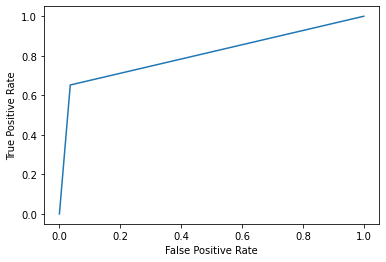

In [43]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_CNN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy in CNN classifier model = ', metrics.accuracy_score(y_pred_class_CNN, y2)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_class_CNN, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_class_CNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_class_CNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_class_CNN, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_class_CNN, y2, average='macro'))

Accuracy in CNN classifier model =  78.66838183108588
Confusion Matrix = [[9365 4463]
 [ 346 8370]]
Recall = 0.7866838183108588
Precision = 0.8436880458643689
Classification Report =
               precision    recall  f1-score   support

           0       0.96      0.68      0.80     13828
           1       0.65      0.96      0.78      8716

    accuracy                           0.79     22544
   macro avg       0.81      0.82      0.79     22544
weighted avg       0.84      0.79      0.79     22544

F1 Score =  0.7862674718927158


<AxesSubplot:>

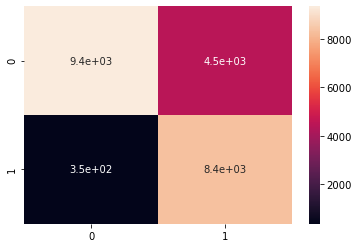

In [45]:
cm_CNN = metrics.confusion_matrix(y_pred_class_CNN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_CNN, annot=True)

<AxesSubplot:>

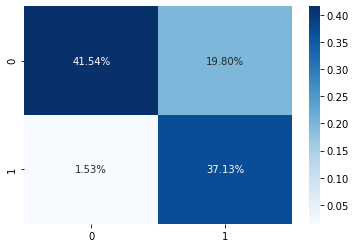

In [46]:
sns.heatmap(cm_CNN/np.sum(cm_CNN), annot=True, 
            fmt='.2%', cmap='Blues')

In [47]:
# 5. TCN CLASSIFIER MODEL

print(x1_encode.shape[0])
print(x2_encode.shape[0])

134686
22544


In [48]:
print(x1_encode.shape, y1.shape, x2_encode.shape, y2.shape)
x1_encode_TCN = np.reshape(x1_encode, (x1_encode.shape[0],x1_encode.shape[1],1))
x2_encode_TCN = np.reshape(x2_encode, (x2_encode.shape[0],x2_encode.shape[1],1))
print(x1_encode_TCN.shape, y1.shape, x2_encode_TCN.shape, y2.shape)

(134686, 13) (134686,) (22544, 13) (22544,)
(134686, 13, 1) (134686,) (22544, 13, 1) (22544,)


In [49]:
from tensorflow.keras.utils import to_categorical
num_classes = 2
y1_TCN = to_categorical(y1, num_classes)
y2_TCN = to_categorical(y2, num_classes)
print(x1_encode_TCN.shape, y1_TCN.shape, x2_encode_TCN.shape, y2_TCN.shape)

(134686, 13, 1) (134686, 2) (22544, 13, 1) (22544, 2)


In [50]:
y1_TCN = np.expand_dims(y1_TCN, axis=2)
y2_TCN = np.expand_dims(y2_TCN, axis=2)
print(x1_encode_TCN.shape, y1_TCN.shape, x2_encode_TCN.shape, y2_TCN.shape)

(134686, 13, 1) (134686, 2, 1) (22544, 13, 1) (22544, 2, 1)


In [51]:
!pip install keras-tcn

In [52]:
import numpy as np
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Dropout, Embedding
from tensorflow.keras.preprocessing import sequence
from tcn import compiled_tcn

In [53]:
model_TCN = compiled_tcn(return_sequences = False,num_feat = 1, num_classes = 2, nb_filters = 64,kernel_size=6,
                    dilations=[1,2,4,8,16,32,64],nb_stacks=1, opt='adam',lr=0.002,activation = 'relu',kernel_initializer = 
                    'he_normal',use_batch_norm=True,use_layer_norm = False,use_weight_norm = False,
                     max_len=x1_encode_TCN[0:1].shape[1],use_skip_connections=True) 

x.shape= (None, 64)
model.x = (None, 13, 1)
model.y = (None, 2)


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [54]:
print(x1_encode_TCN[0:1].shape[1])

13


In [55]:
print(f'x_train.shape = {x1_encode_TCN.shape}')
print(f'y_train.shape = {y1_TCN.shape}')
print(f'x_test.shape = {x2_encode_TCN.shape}')
print(f'y_test.shape = {y2_TCN.shape}')

x_train.shape = (134686, 13, 1)
y_train.shape = (134686, 2, 1)
x_test.shape = (22544, 13, 1)
y_test.shape = (22544, 2, 1)


In [56]:
model_TCN.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 13, 1)]           0         
                                                                 
 tcn (TCN)                   (None, 64)                324480    
                                                                 
 dense_14 (Dense)            (None, 2)                 130       
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 324,610
Trainable params: 322,818
Non-trainable params: 1,792
_________________________________________________________________


In [57]:
y1_TCN = y1_TCN.squeeze().argmax(axis=1)
y2_TCN = y2_TCN.squeeze().argmax(axis=1)

In [58]:
history = model_TCN.fit(x1_encode_TCN, y1_TCN, epochs = 10, validation_data = [x2_encode_TCN, y2_TCN], 
                    workers=4, use_multiprocessing=True)

Epoch 1/10
4209/4209 [==============================] - 680s 156ms/step - loss: 0.0627 - accuracy: 0.9776 - val_loss: 0.9730 - val_accuracy: 0.7578
Epoch 2/10
4209/4209 [==============================] - 607s 144ms/step - loss: 0.0448 - accuracy: 0.9833 - val_loss: 0.8573 - val_accuracy: 0.7793
Epoch 3/10
4209/4209 [==============================] - 717s 170ms/step - loss: 0.0381 - accuracy: 0.9855 - val_loss: 0.9095 - val_accuracy: 0.7610
Epoch 4/10
4209/4209 [==============================] - 718s 171ms/step - loss: 0.0342 - accuracy: 0.9873 - val_loss: 1.0817 - val_accuracy: 0.7526
Epoch 5/10
4209/4209 [==============================] - 717s 170ms/step - loss: 0.0317 - accuracy: 0.9879 - val_loss: 1.2750 - val_accuracy: 0.7510
Epoch 6/10
4209/4209 [==============================] - 730s 173ms/step - loss: 0.0297 - accuracy: 0.9886 - val_loss: 1.0679 - val_accuracy: 0.7610
Epoch 7/10
4209/4209 [==============================] - 734s 174ms/step - loss: 0.0287 - accuracy: 0.9892 - val_

In [59]:
result = model_TCN.evaluate(x2_encode_TCN, y2_TCN)
print(f"Accuracy : {result[1] * 100:.2f} %")
print(f"Loss : {result[0] * 100:.2f} %")

705/705 [==============================] - 42s 59ms/step - loss: 1.0961 - accuracy: 0.7744
Accuracy : 77.44 %
Loss : 109.61 %


In [60]:
y_pred_TCN = model_TCN.predict(x2_encode_TCN, verbose=0)
print(np.argmax(y_pred_TCN, axis=1))
y_pred_class_TCN=np.argmax(y_pred_TCN,axis=1)
print(y_pred_class_TCN)

[1 1 0 ... 1 0 1]
[1 1 0 ... 1 0 1]


In [61]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2_TCN, y_pred_class_TCN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.792045


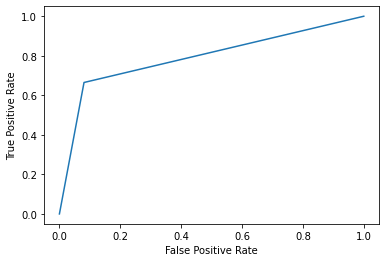

In [62]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy in TCN classifier model = ', metrics.accuracy_score(y_pred_class_TCN, y2_TCN)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_class_TCN, y2_TCN, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_class_TCN, y2_TCN, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_class_TCN, y2_TCN, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_class_TCN, y2_TCN, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_class_TCN, y2_TCN, average='macro'))

Accuracy in TCN classifier model =  77.44410929737401
Confusion Matrix = [[8926 4300]
 [ 785 8533]]
Recall = 0.7744410929737402
Precision = 0.8140811177234013
Classification Report =
               precision    recall  f1-score   support

           0       0.92      0.67      0.78     13226
           1       0.66      0.92      0.77      9318

    accuracy                           0.77     22544
   macro avg       0.79      0.80      0.77     22544
weighted avg       0.81      0.77      0.78     22544

F1 Score =  0.7743725259765348


<AxesSubplot:>

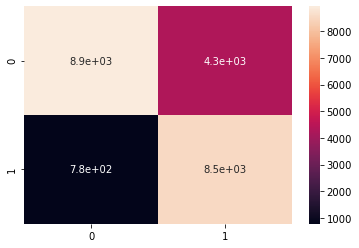

In [64]:
cm_TCN = metrics.confusion_matrix(y_pred_class_TCN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_TCN, annot=True)

<AxesSubplot:>

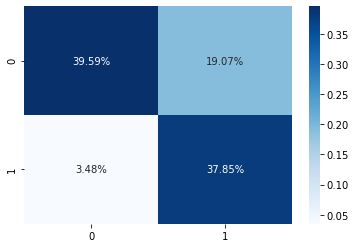

In [65]:
sns.heatmap(cm_TCN/np.sum(cm_TCN), annot=True, 
            fmt='.2%', cmap='Blues')

In [66]:
# 6. TabNet CLASSIFIER MODEL

print("X train shape: ", x1_recon.shape)
print("X test shape: ", x2_recon.shape)
print("Y train shape: ", y1.shape)
print("Y test shape: ", y2.shape)

X train shape:  (134686, 13)
X test shape:  (22544, 13)
Y train shape:  (134686,)
Y test shape:  (22544,)


In [67]:
!pip install pytorch-tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [68]:
# define the model
model_TabNet = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=5e-2),
                       scheduler_params={"step_size":10,"gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax')

Device used : cpu


In [69]:
# fit the model 
model_TabNet.fit(x1_encode,y1, eval_set=[(x1_encode, y1), (x2_encode, y2)],eval_name=['train', 'valid'],
                   eval_metric=['auc','accuracy'],max_epochs=20 , patience=50, batch_size=256, virtual_batch_size=128, 
                   num_workers=0, weights=1,drop_last=False)   

epoch 0  | loss: 0.09404 | train_auc: 0.99524 | train_accuracy: 0.96979 | valid_auc: 0.92792 | valid_accuracy: 0.76002 |  0:01:40s
epoch 1  | loss: 0.06381 | train_auc: 0.99818 | train_accuracy: 0.98226 | valid_auc: 0.90871 | valid_accuracy: 0.74397 |  0:02:45s
epoch 2  | loss: 0.05432 | train_auc: 0.99808 | train_accuracy: 0.98024 | valid_auc: 0.93821 | valid_accuracy: 0.74148 |  0:03:22s
epoch 3  | loss: 0.0466  | train_auc: 0.99875 | train_accuracy: 0.98103 | valid_auc: 0.94204 | valid_accuracy: 0.75271 |  0:03:58s
epoch 4  | loss: 0.04439 | train_auc: 0.99885 | train_accuracy: 0.98557 | valid_auc: 0.93606 | valid_accuracy: 0.78278 |  0:04:39s
epoch 5  | loss: 0.04544 | train_auc: 0.99881 | train_accuracy: 0.98247 | valid_auc: 0.91827 | valid_accuracy: 0.75129 |  0:05:26s
epoch 6  | loss: 0.04383 | train_auc: 0.99907 | train_accuracy: 0.98555 | valid_auc: 0.92261 | valid_accuracy: 0.75235 |  0:06:15s
epoch 7  | loss: 0.04007 | train_auc: 0.99889 | train_accuracy: 0.98404 | valid_auc

Text(0, 0.5, 'Feature index')

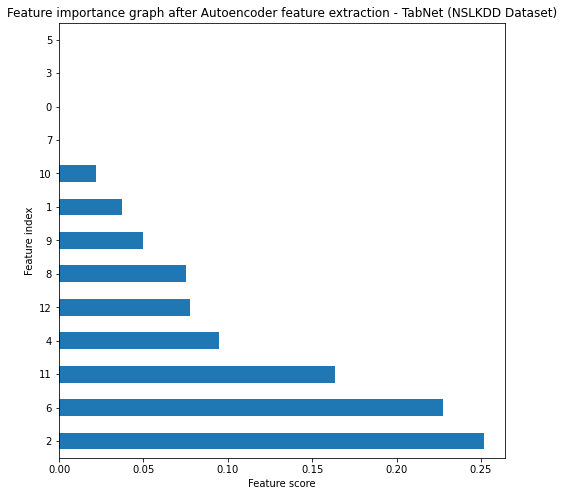

In [70]:
# find and plot feature importance 
from IPython.core.pylabtools import figsize
figsize(8, 8)
model_TabNet.feature_importances_
feat_importances = pd.Series(model_TabNet.feature_importances_)
feat_importances.nlargest(14).plot(kind='barh')
plt.title("Feature importance graph after Autoencoder feature extraction - TabNet (NSLKDD Dataset)")
plt.xlabel("Feature score")
plt.ylabel("Feature index")

In [71]:
y_pred_TabNet = model_TabNet.predict(x2_encode)
print(y_pred_TabNet)

[1 1 0 ... 1 0 1]


In [72]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_TabNet)
print('ROC AUC: %f' % auc)

ROC AUC: 0.822504


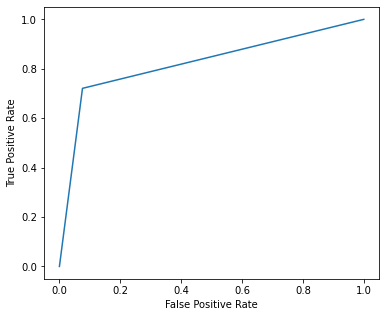

In [79]:
figsize(6, 5)
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score
test_acc = accuracy_score(y_pred_TabNet, y2)
print("Accuracy in TabNet classifier model:",test_acc*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_TabNet, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_TabNet, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_TabNet, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_TabNet, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_TabNet, y2, average='macro'))

Accuracy in TabNet classifier model: 80.84190915542938
Confusion Matrix = [[8975 3583]
 [ 736 9250]]
Recall = 0.8084190915542938
Precision = 0.8341072195012523
Classification Report =
               precision    recall  f1-score   support

           0       0.92      0.71      0.81     12558
           1       0.72      0.93      0.81      9986

    accuracy                           0.81     22544
   macro avg       0.82      0.82      0.81     22544
weighted avg       0.83      0.81      0.81     22544

F1 Score =  0.8083905800394556


<AxesSubplot:>

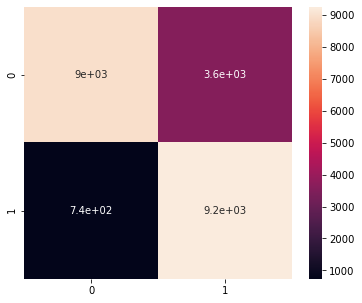

In [80]:
cm_TabNet = metrics.confusion_matrix(y_pred_TabNet, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_TabNet, annot=True)

<AxesSubplot:>

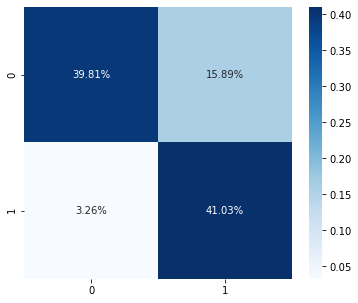

In [81]:
sns.heatmap(cm_TabNet/np.sum(cm_TabNet), annot=True, 
            fmt='.2%', cmap='Blues')

In [77]:
print("Number of selected features=%d" % (x1_encode[0:1].shape[1]))
print('Accuracy result of all models:')
print("Accuracy in XGBoost classifier model:-", accuracy)
print('Accuracy in DNN classifier model = ', metrics.accuracy_score(y_pred_class_DNN, y2)*100)
print('Accuracy in CNN classifier model = ', metrics.accuracy_score(y_pred_class_CNN, y2)*100)
print('Accuracy in TCN classifier model = ', metrics.accuracy_score(y_pred_class_TCN, y2_TCN)*100)
print("Accuracy in TabNet classifier model:",test_acc*100)

Number of selected features=13
Accuracy result of all models:
Accuracy in XGBoost classifier model:- 75.94038325053229
Accuracy in DNN classifier model =  71.7707594038325
Accuracy in CNN classifier model =  78.66838183108588
Accuracy in TCN classifier model =  77.44410929737401
Accuracy in TabNet classifier model: 80.84190915542938


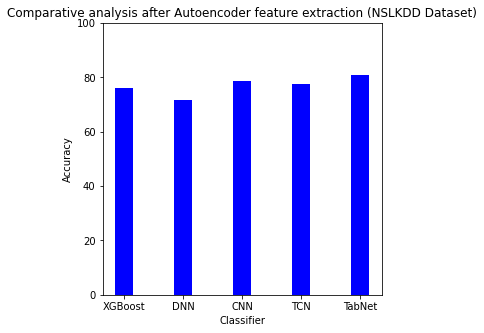

In [82]:
data = {'XGBoost':75.94, 'DNN':71.77, 'CNN':78.67,
        'TCN':77.44, 'TabNet':80.84}
Classifier_model = list(data.keys())
Classifier_accuracy = list(data.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Classifier_model, Classifier_accuracy, color ='blue',
        width = 0.3)
plt.ylim(0, 100)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Comparative analysis after Autoencoder feature extraction (NSLKDD Dataset)")
plt.show()

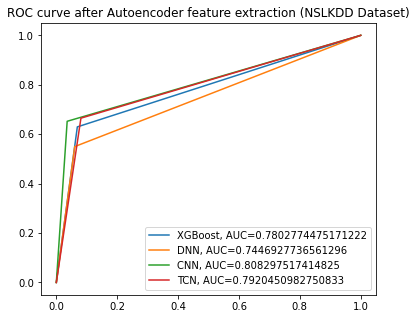

In [83]:
#set up plotting area
plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_new)
auc = roc_auc_score(y2, y_pred_new)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_DNN)
auc = roc_auc_score(y2, y_pred_class_DNN)
plt.plot(fpr,tpr,label="DNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_CNN)
auc = roc_auc_score(y2, y_pred_class_CNN)
plt.plot(fpr,tpr,label="CNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
auc = roc_auc_score(y2, y_pred_class_TCN)
plt.plot(fpr,tpr,label="TCN, AUC="+str(auc))

#add legend
plt.title("ROC curve after Autoencoder feature extraction (NSLKDD Dataset)")
plt.legend()

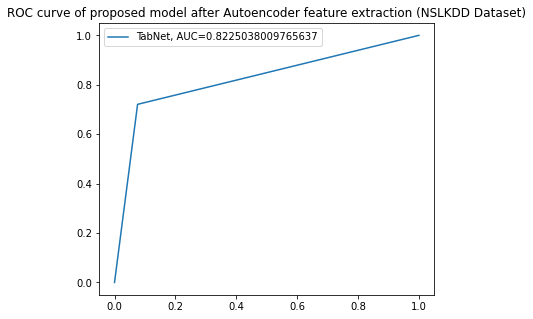

In [84]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
auc = roc_auc_score(y2, y_pred_TabNet)
plt.plot(fpr,tpr,label="TabNet, AUC="+str(auc))
#add legend
plt.title("ROC curve of proposed model after Autoencoder feature extraction (NSLKDD Dataset)")
plt.legend()

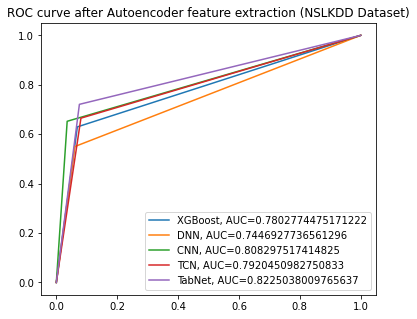

In [87]:
#set up plotting area
from IPython.core.pylabtools import figsize
figsize(6, 5)
plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_new)
auc = roc_auc_score(y2, y_pred_new)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_DNN)
auc = roc_auc_score(y2, y_pred_class_DNN)
plt.plot(fpr,tpr,label="DNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_CNN)
auc = roc_auc_score(y2, y_pred_class_CNN)
plt.plot(fpr,tpr,label="CNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
auc = roc_auc_score(y2, y_pred_class_TCN)
plt.plot(fpr,tpr,label="TCN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
auc = roc_auc_score(y2, y_pred_TabNet)
plt.plot(fpr,tpr,label="TabNet, AUC="+str(auc))

#add legend
plt.title("ROC curve after Autoencoder feature extraction (NSLKDD Dataset)")
plt.legend()

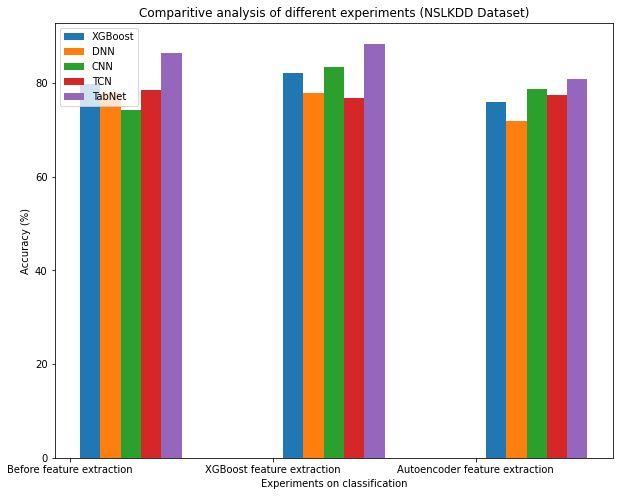

In [85]:
from IPython.core.pylabtools import figsize
figsize(10, 8)
# Import Library
import numpy as np 
import matplotlib.pyplot as plt 

# Define Data
data3 = ['Before feature extraction','XGBoost feature extraction','Autoencoder feature extraction']
xvals = [79.79,82.10,75.94]
yvals = [77.85,77.72,71.77]
zvals = [74.16,83.40,78.67]
avals = [78.42,76.77,77.44]
bvals = [86.39,88.35,80.84]

x_axis = np.arange(len(data3))

# Multi bar Chart
plt.bar(x_axis +0.1, xvals, width=0.1, label = 'XGBoost')
plt.bar(x_axis +0.1*2, yvals, width=0.1, label = 'DNN')
plt.bar(x_axis +0.1*3, zvals, width=0.1, label = 'CNN')
plt.bar(x_axis +0.1*4, avals, width=0.1, label = 'TCN')
plt.bar(x_axis +0.1*5, bvals, width=0.1, label = 'TabNet')

# Xticks
plt.xticks(x_axis,data3)
plt.ylabel("Accuracy (%)")
plt.xlabel("Experiments on classification")
plt.title("Comparitive analysis of different experiments (NSLKDD Dataset)")
plt.legend()
plt.show()